# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import scipy.stats as st
import statsmodels as sm
import statsmodels.stats.weightstats as wst

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

## Summary info about the dataset

In [18]:
df.info()
# The dataset has 130 rows and all are non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [19]:
pd.DataFrame(df.groupby(by = 'gender').size())
# The dataset has 65 rows each for Male and Female

,0
gender,
F,65
M,65


In [20]:
df.describe()
# Stats about the temperature and heart_rate

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## 1. Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

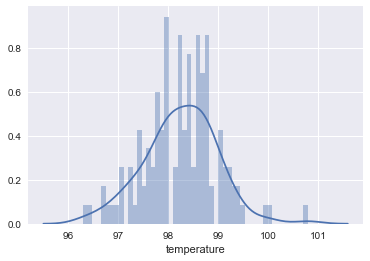

In [21]:
# We will plot the histogram and kdepplot of body temperatures to see if the distribution is normal
sns.distplot(df.temperature, bins = 50)

From the above kde plot we can easily see that the sample is normally distributed. Interestingly, the histogram bars shows spikes for a range of values between 98 and 99.

## 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

 The dataset has very limited attributes, namely gender, temperature and heart_rate. There's no 'id' related attributes to 
 verify these are independent observations. However, we can look at the count of unique values for temperature and heart_rate 
 and verify these are sufficiently variable.

In [22]:
import scipy.stats as stats 
x=stats.norm.rvs(size=100)
#x is a list of 100 values drawn from a normal distribution 
stats.normaltest(x) # this would do a chisquare test and return two values. first value would be chi squared statistic and


NormaltestResult(statistic=0.85411330318072864, pvalue=0.65242659017700122)

In [23]:
y = stats.uniform.rvs(size =100)
stats.normaltest(y)

NormaltestResult(statistic=25.498777712405463, pvalue=2.9040946858798758e-06)

(array([ 12.,  11.,   7.,   8.,  14.,   9.,  11.,  10.,   9.,   9.]),
 array([ 0.00279863,  0.10033063,  0.19786264,  0.29539464,  0.39292664,
         0.49045864,  0.58799064,  0.68552264,  0.78305464,  0.88058664,
         0.97811864]),
 <a list of 10 Patch objects>)

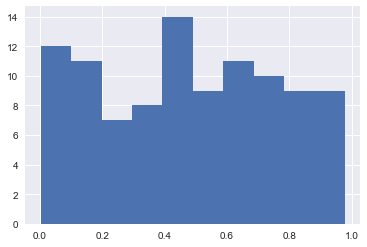

In [24]:
plt.hist(y)

In [25]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [26]:
 df.groupby(by = 'temperature').size()
# (df.temperature //1 ).value_counts().sort_index()

temperature
96.3      1
96.4      1
96.7      2
96.8      1
96.9      1
97.0      1
97.1      3
97.2      3
97.3      1
97.4      5
97.5      2
97.6      4
97.7      3
97.8      7
97.9      5
98.0     11
98.1      3
98.2     10
98.3      5
98.4      9
98.5      3
98.6     10
98.7      8
98.8     10
98.9      2
99.0      5
99.1      3
99.2      3
99.3      2
99.4      2
99.5      1
99.9      1
100.0     1
100.8     1
dtype: int64

In [27]:
df.groupby(by = 'heart_rate').size()

heart_rate
57.0     2
58.0     1
59.0     1
61.0     2
62.0     2
63.0     1
64.0     6
65.0     3
66.0     4
67.0     2
68.0     6
69.0     6
70.0     7
71.0     6
72.0     5
73.0    10
74.0     6
75.0     5
76.0     3
77.0     7
78.0    10
79.0     7
80.0     4
81.0     5
82.0     5
83.0     4
84.0     4
85.0     1
86.0     2
87.0     1
89.0     2
dtype: int64

From the above, we can conclude that the observations are independent.
Also, the sample size is 130 which is sufficiently large to apply z statistics and CLT

## 3. Is the true population mean really 98.6 degrees F?


### * Would you use a one-sample or two-sample test? Why?

    A one-sample test would be appropriate here as we will consider the available sample as a single sample representing the population. The null hypothesis is that the population mean is 98.6 F. The alternate hypothesis is that the true population mean is not 98.6 F. It could be either lesser or greater than 98.6. So we could use a one-sample two tailed test.
    
### * In this situation, is it appropriate to use the t or z statistic?

    The sample size is 130 which is not too small. So we can use z statistic if we assume that the observed standard deviation approximates the population standard deviation. 
    

####  One-sample test for population mean

In [28]:
sample_mean = np.mean(df.temperature)
sample_sd = np.std(df.temperature)
#se = sample_sd / math.sqrt(130)
se = st.sem(df.temperature)

In [48]:
#Considering a two-tailed test with alpha of 1% 
# Since the observed mean is less than 98.6, finding the lower tail probability of getting a value less than or equal to 
# the observed sample mean
lower_tail_prob = st.norm.cdf(sample_mean, loc = 98.6, scale = se) 
lower_tail_prob
#st.norm.interval(0.95, loc = 98.6, scale =se)

2.451078507056712e-08

In [49]:
# Since it's a two tailed test, the alpha value has to be divided between the lower and upper tails, 0.5% each.
# Comparing the prob of observed value to 0.5%
if (lower_tail_prob < 0.005 ) :
    print ('The result is statistically significant to prove the true population mean temperature may not be 98.6')


The result is statistically significant to prove the true population mean temperature may not be 98.6


In [51]:
# Trying an alternative way of doing the one-sample test 
wst.ztest(x1 = df.temperature, value = 98.6)
# The two tailed p-value is less than the alpha value of 0.01

(-5.4548232923645195, 4.9021570141012155e-08)

### * Now try using the other test. How is the result be different? Why?

Note - Assuming the other test meant here is the 'One-tail' test and not two-sample test. 

In [54]:
# Considering a one-tail test with alternate hypothesis as true population mean temperature is less than 98.6
# Comparing the prob of observed value to 1%
tstat, pval = wst.ztest(x1 = df.temperature, value = 98.6, alternative='smaller')
if (pval < 1 ) :
    print ('The result is statistically significant to prove the true population mean temperature is less than 98.6')
pval

The result is statistically significant to prove the true population mean temperature is less than 98.6


2.4510785070506077e-08

The result is not different between the one-tail test and two-tail test, the reason being that the p-value seen is very low.

## 4. At what temperature should we consider someone's temperature to be "abnormal"?
### * Start by computing the margin of error and confidence interval.

In [33]:
# Computing the 95% confidence interval 
conf_interval = st.norm.interval(.95, loc = sample_mean, scale = se)
conf_interval


(98.123196428181657, 98.375265110279898)

In [34]:
# Margin of error calculation. 
lower, upper = conf_interval
moe = (upper - lower) /2
round(moe, 3)

0.126

Based on the observed sample, the population mean of temperature is estimated to be in the below interval.

In [35]:
conf_interval

(98.123196428181657, 98.375265110279898)

OR

In [36]:
print("%f +- %f" %(sample_mean,moe))

98.249231 +- 0.126034


So, a temperature outside of this range can be considered abnormal.

## Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

Here we can use a two-sample test and see whether males and females differ in normal temperature. 
In the dataset we have the data for males and females in 65 records each. 

In [37]:
# Separating the male and female datasets
m_df = df[df.gender == 'M']
f_df = df[df.gender == 'F']


In [45]:
# Assuming equal variance for male and female groups
#st.ttest_ind(m_df.temperature, f_df.temperature)
wst.ztest(x1 = m_df.temperature, x2 = f_df.temperature)


(-2.2854345381656103, 0.02228736076065755)

Considering an alpha value of 1%, the observed p-value of 2.4% is not statistically significant. 
Hence we fail to reject the null hypothesis that there's no difference in normal temperature between males and females. 